In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
sb.__version__


'0.11.2'

In [3]:
data = pd.read_csv("cardio_train.csv", sep = ";")
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
data["cholesterol"].dtypes

dtype('int64')

In [5]:
Catcolumns = ["gender","cholesterol","gluc","smoke","alco", "active","cardio"]
data[Catcolumns] = data[Catcolumns].astype("category")
data = data.drop(columns = "id")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          70000 non-null  int64   
 1   gender       70000 non-null  category
 2   height       70000 non-null  int64   
 3   weight       70000 non-null  float64 
 4   ap_hi        70000 non-null  int64   
 5   ap_lo        70000 non-null  int64   
 6   cholesterol  70000 non-null  category
 7   gluc         70000 non-null  category
 8   smoke        70000 non-null  category
 9   alco         70000 non-null  category
 10  active       70000 non-null  category
 11  cardio       70000 non-null  category
dtypes: category(7), float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
data.describe()


,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


Histogram explore

<AxesSubplot:xlabel='height', ylabel='Count'>

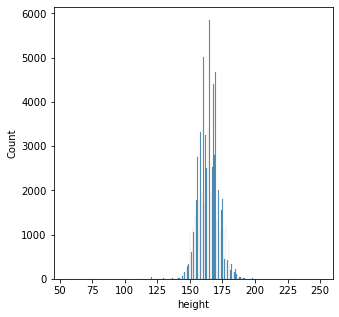

In [7]:
fig = plt.figure(figsize = (5,5))
sb.histplot(data = data["height"])

Convert Age

In [8]:
data["age/year"] = data["age"]/365.0
data["age/year"] = data["age/year"].round(0)
data["age/year"]

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age/year, Length: 70000, dtype: float64

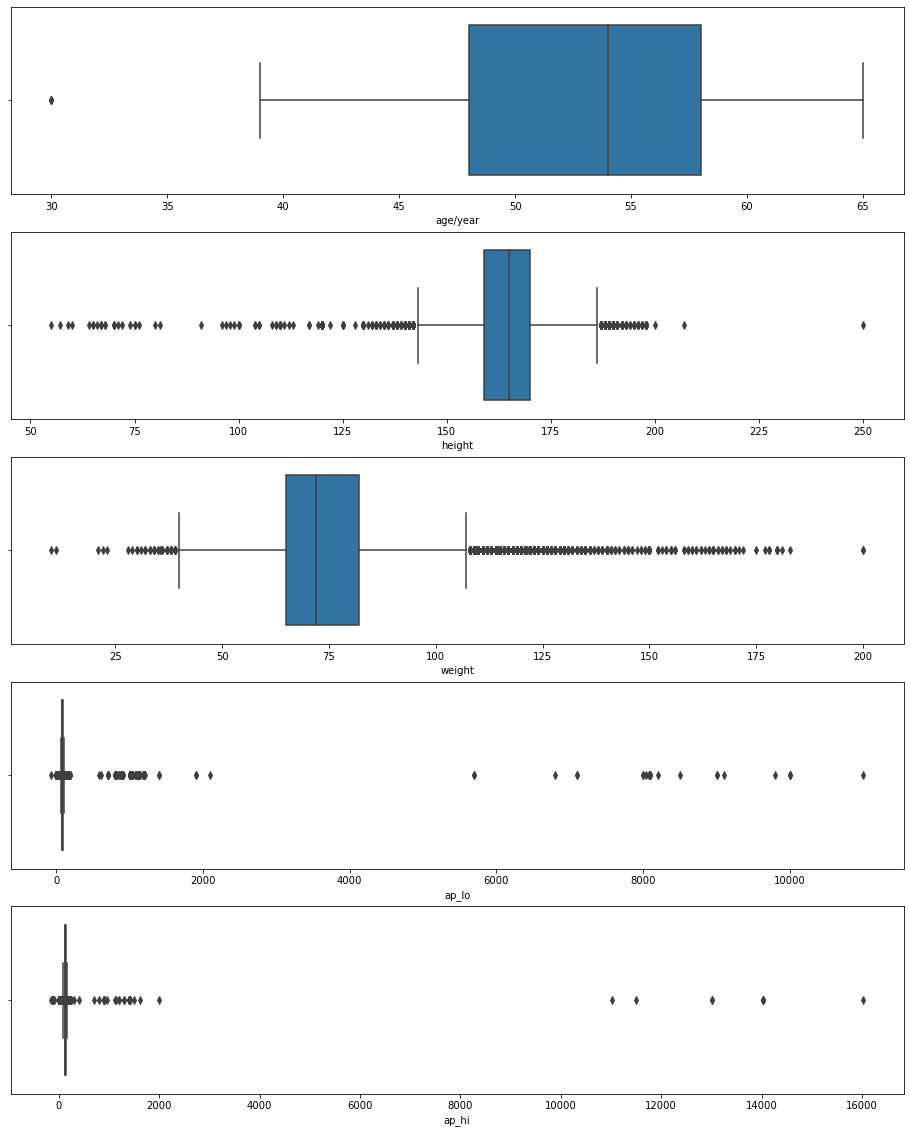

In [9]:
num_attribs = ["age/year","height","weight","ap_lo","ap_hi"]
num = data[num_attribs]
fig, axes = plt.subplots(5,1, figsize = (16,20))
count = 0

## Box plot of the numeric data
for var in num:
	sb.boxplot(data = data, x = var, orient = 'h', ax = axes[count])
	count +=1

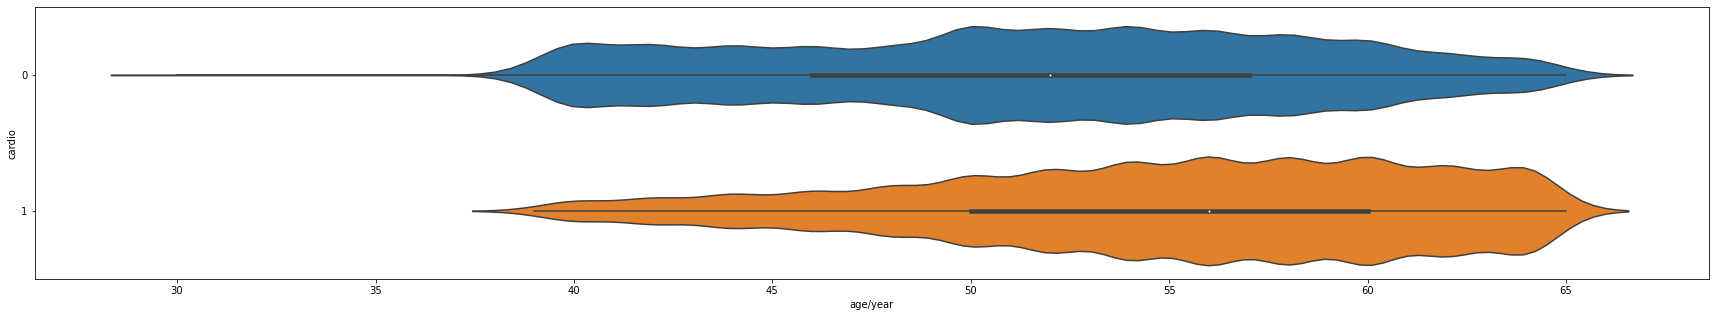

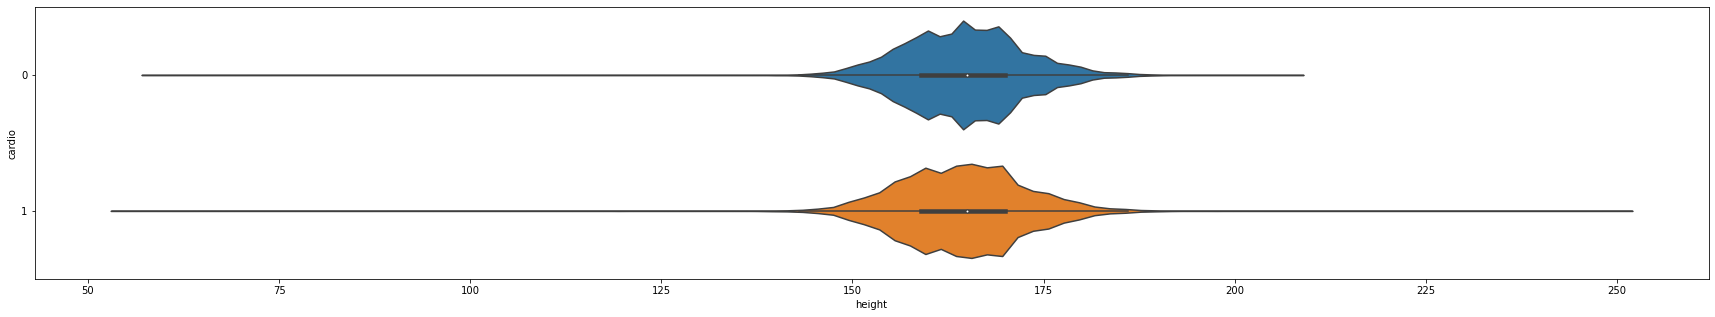

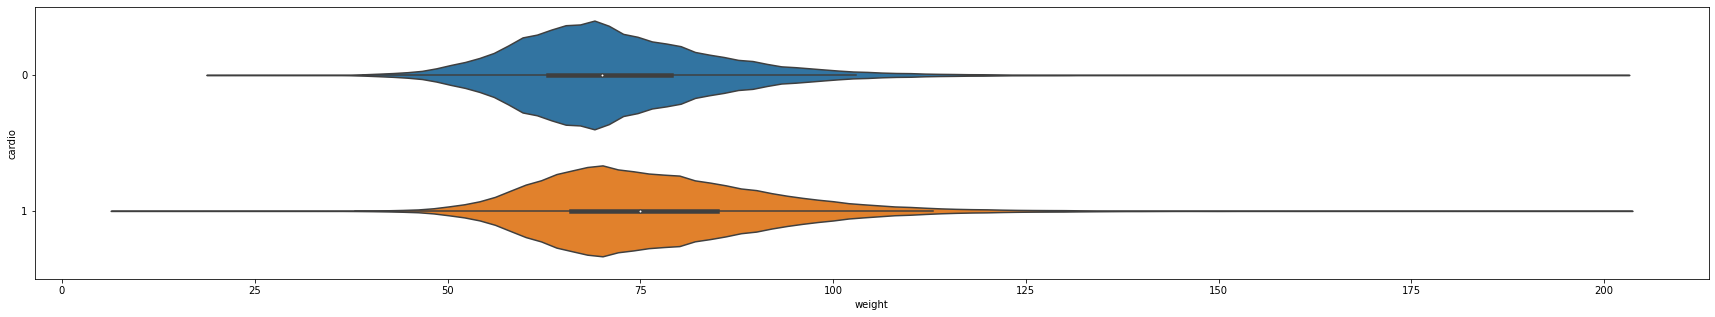

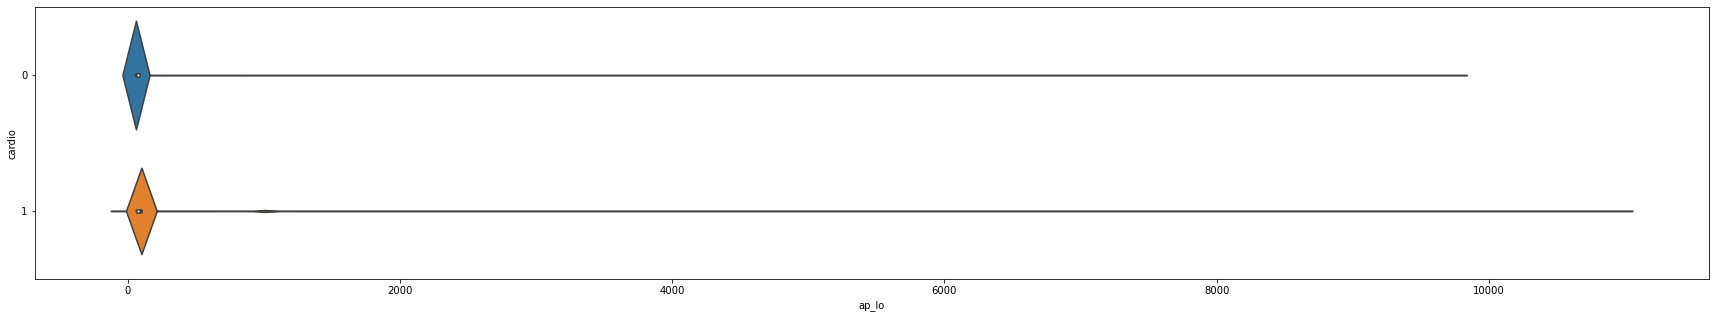

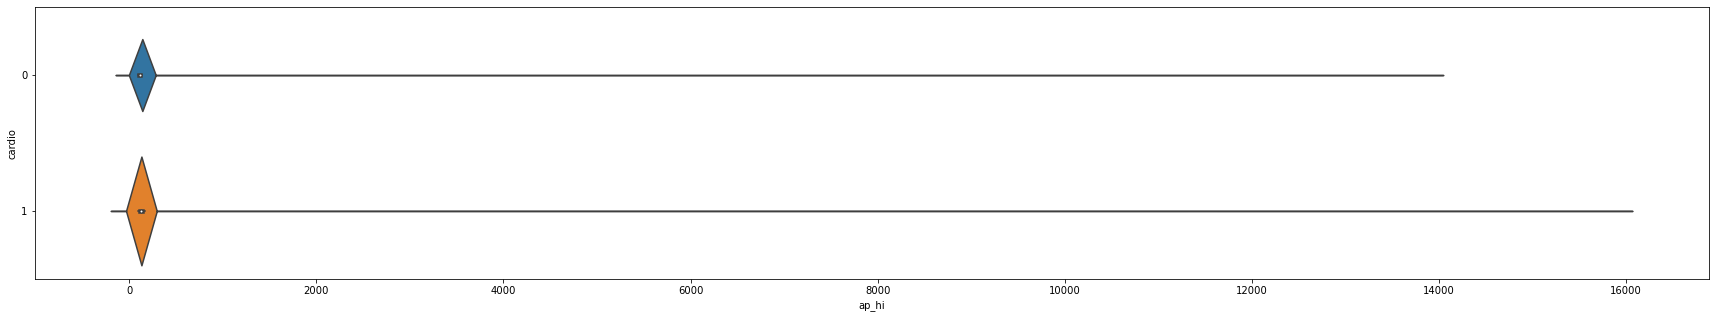

In [10]:
# Bivariate analysis of the 5 numeric data


for attribs in num_attribs:
	fig = plt.figure(figsize= (30,5))
	sb.violinplot (data = data, x = attribs, y = 'cardio', orient = 'h')	

<AxesSubplot:xlabel='BMI'>

age            244
gender         244
height         244
weight         244
ap_hi          244
ap_lo          244
cholesterol    244
gluc           244
smoke          244
alco           244
active         244
cardio         244
age/year       244
BMI            244
dtype: int64

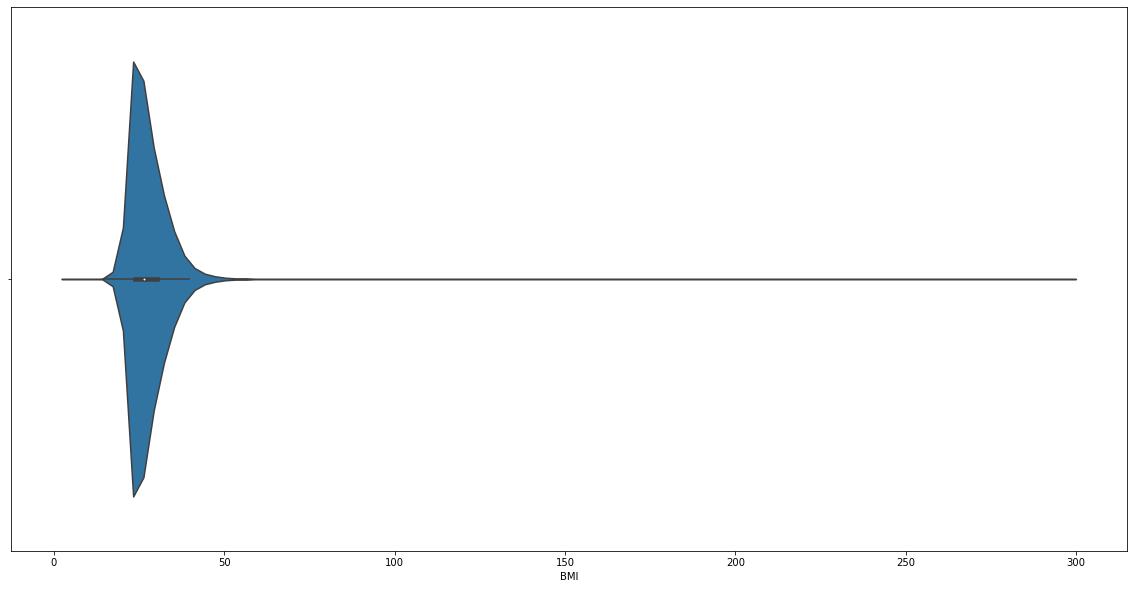

In [11]:
"""
BMI = Weight / (Height)^2
"""

data["BMI"] = data["weight"]/(data["height"]/100.0)**2
fig = plt.figure(figsize = (20,10))
display(sb.violinplot(x = data["BMI"]))
data.loc[data["BMI"] > 50].count()

In [12]:
# if data["BMI"] < 18.5:
# 	data["Obesity"] = "Underweight"
# elif data["BMI"] < 24.9:
# 	data["Obesity"] = "Healthy"
# elif data["BMI"] < 29.9:
# 	data["Obesity"] = "Overweight"
# else:
# 	 data["Obesity"] = "Obese"

bmi = data['BMI']
data["Obesity"] = "Underweight"
data.loc[bmi >= 18.5, "Obesity"] = "Healthy"
data.loc[bmi >= 25, "Obesity"] = "Overweight"
data.loc[bmi >= 30, "Obesity"] = "Obese"
data["Obesity"] = data["Obesity"].astype("category")


data["Obesity_num"] = 0
data.loc[bmi >= 18.5, "Obesity_num"] = 1
data.loc[bmi >= 25, "Obesity_num"] = 2
data.loc[bmi >= 30, "Obesity_num"] = 3
data["Obesity_num"] = data["Obesity_num"].astype("category")

display(data)
data.dtypes

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age/year,BMI,Obesity,Obesity_num
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120,Healthy,1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679,Obese,3
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805,Healthy,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479,Overweight,2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177,Healthy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,53.0,26.927438,Overweight,2
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,62.0,50.472681,Obese,3
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.0,31.353579,Obese,3
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.0,27.099251,Overweight,2


age               int64
gender         category
height            int64
weight          float64
ap_hi             int64
ap_lo             int64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
age/year        float64
BMI             float64
Obesity        category
Obesity_num    category
dtype: object

<AxesSubplot:xlabel='cholesterol', ylabel='cardio'>

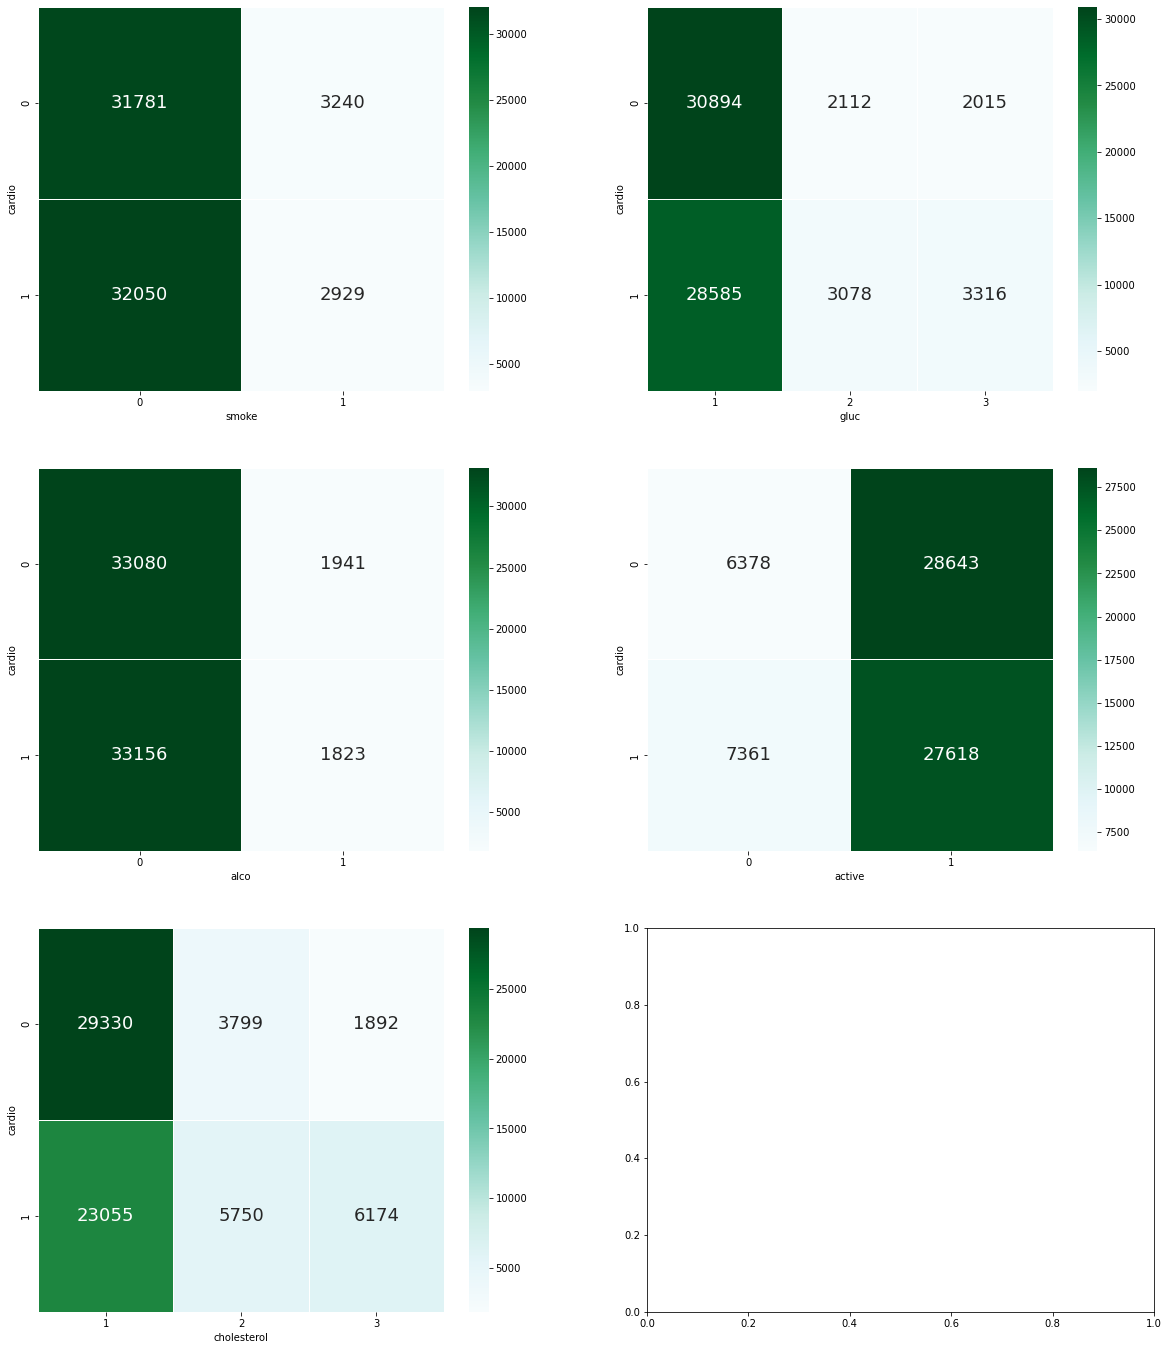

In [13]:
cardio_clean = data
f,axes = plt.subplots(3,2,figsize=(20, 24))
sb.heatmap(cardio_clean.groupby(['cardio', 'smoke']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn',ax=axes[0][0])
sb.heatmap(cardio_clean.groupby(['cardio', 'gluc']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn',ax=axes[0][1])
sb.heatmap(cardio_clean.groupby(['cardio', 'alco']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn',ax=axes[1][0])
sb.heatmap(cardio_clean.groupby(['cardio', 'active']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn',ax=axes[1][1])
sb.heatmap(cardio_clean.groupby(['cardio', 'cholesterol']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn',ax=axes[2][0])

In [14]:
a = data.groupby(["cardio","smoke"]).size().unstack()
a


smoke,0,1
cardio,,
0,31781,3240
1,32050,2929


<AxesSubplot:xlabel='cholesterol', ylabel='gender'>

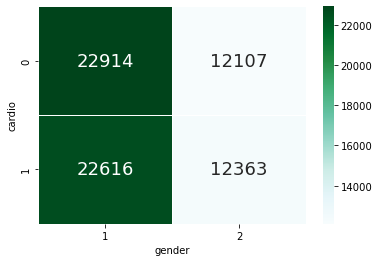

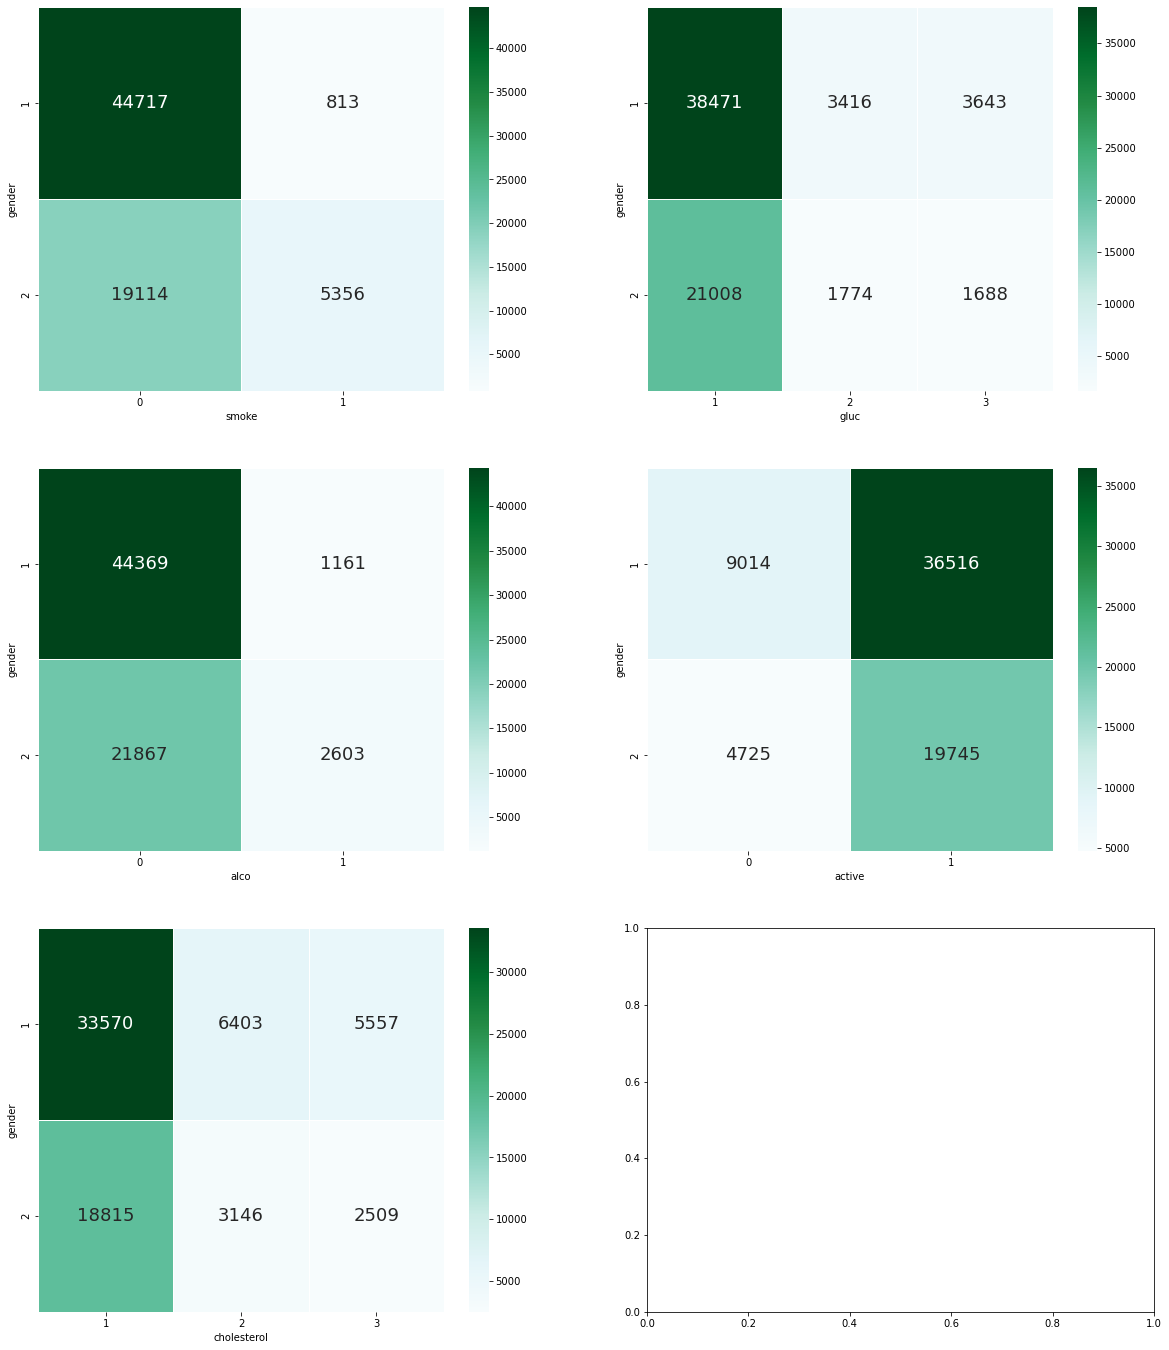

In [15]:
# to consider cardio between different sex
sb.heatmap(cardio_clean.groupby(['cardio', 'gender']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn')
# to find out relationship between sex and other categorical factors
f,axes = plt.subplots(3,2,figsize=(20, 24))
sb.heatmap(cardio_clean.groupby(['gender', 'smoke']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn',ax=axes[0][0])
sb.heatmap(cardio_clean.groupby(['gender', 'gluc']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn',ax=axes[0][1])
sb.heatmap(cardio_clean.groupby(['gender', 'alco']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn',ax=axes[1][0])
sb.heatmap(cardio_clean.groupby(['gender', 'active']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn',ax=axes[1][1])
sb.heatmap(cardio_clean.groupby(['gender', 'cholesterol']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, fmt='.0f', 
           cmap='BuGn',ax=axes[2][0])

In [16]:
data["gender"].value_counts()
display(data)

# Data is skewed towards 1


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age/year,BMI,Obesity,Obesity_num
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120,Healthy,1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679,Obese,3
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805,Healthy,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479,Overweight,2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177,Healthy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,53.0,26.927438,Overweight,2
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,62.0,50.472681,Obese,3
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.0,31.353579,Obese,3
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.0,27.099251,Overweight,2


<AxesSubplot:xlabel='Obesity', ylabel='gender'>

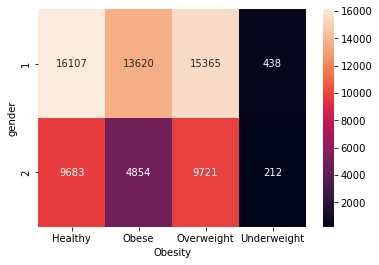

In [17]:
sb.heatmap(data.groupby(["gender","Obesity"]).size().unstack(), annot = True, fmt = "0.0f")

In [18]:
data["Obesity_num"].value_counts().index

CategoricalIndex([1, 2, 3, 0], categories=[0, 1, 2, 3], ordered=False, dtype='category')

In [19]:
# Let's look at the BMI in different cardio groups
# data of people who suffer from cardiovascular diseases
cardio_people = cardio_clean[cardio_clean['cardio']==1] 
# data of people who do not suffer from cardiovascular diseases



<AxesSubplot:xlabel='BMI', ylabel='cardio'>

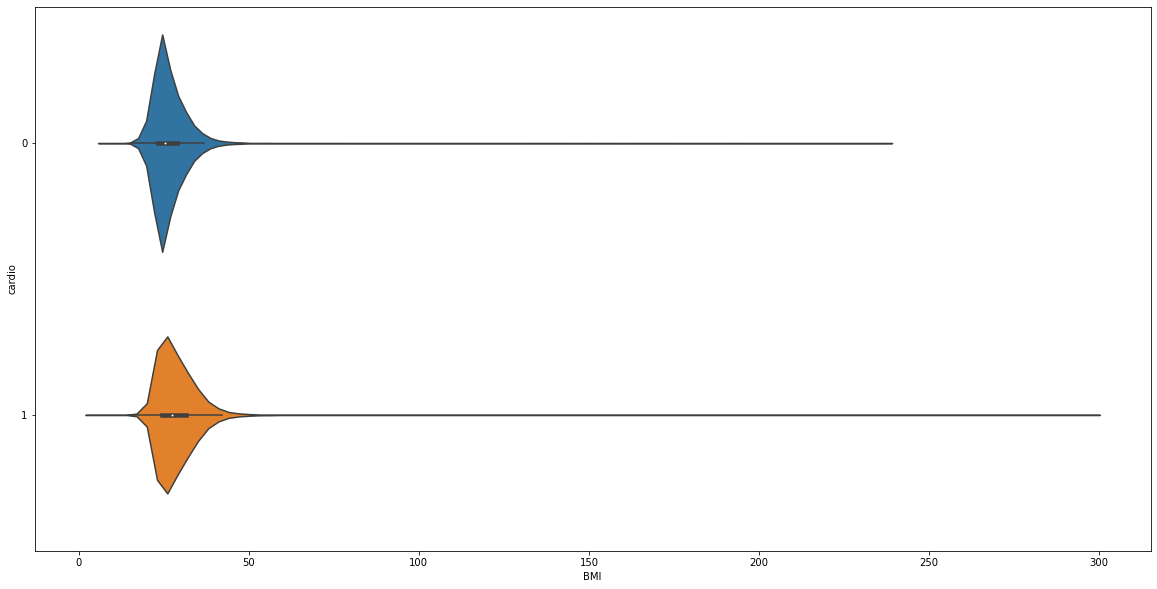

In [20]:
fig = plt.figure(figsize = (20,10))
sb.violinplot(data = data, x = "BMI", y = "cardio", orient = "h")

In [21]:
X = (data[num_attribs])

array([0, 3, 0, ..., 1, 2, 2])

,height,weight,Cluster,Obesity
0,168,62.0,0,1
1,156,85.0,3,3
2,165,64.0,0,1
3,169,82.0,2,2
4,156,56.0,0,1
...,...,...,...,...
69995,168,76.0,2,2
69996,158,126.0,1,3
69997,183,105.0,1,3
69998,163,72.0,2,2


height        int64
weight      float64
Cluster    category
Obesity    category
dtype: object

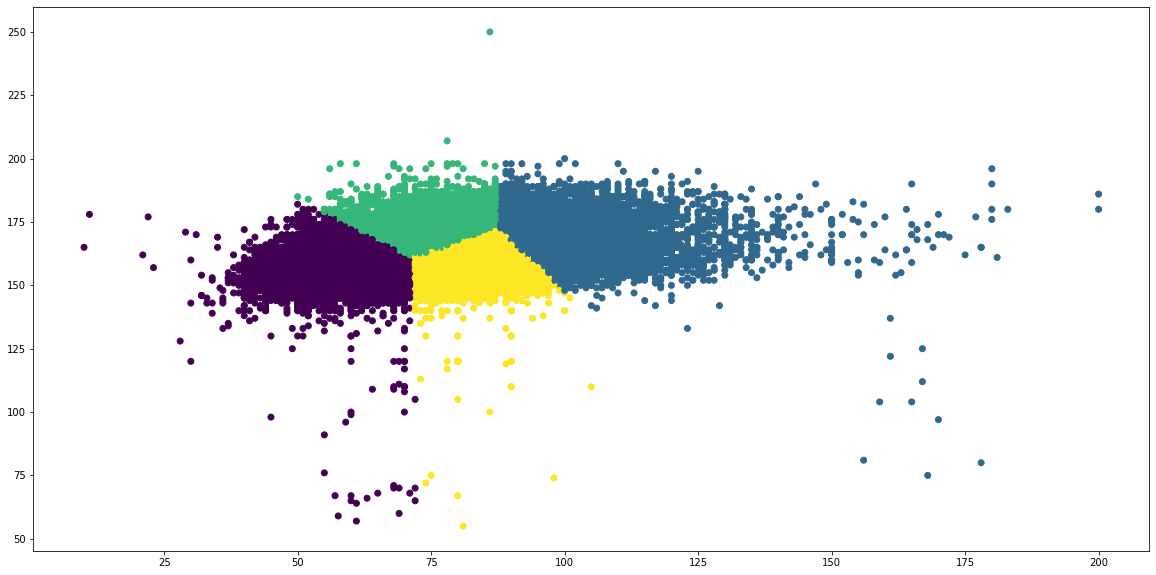

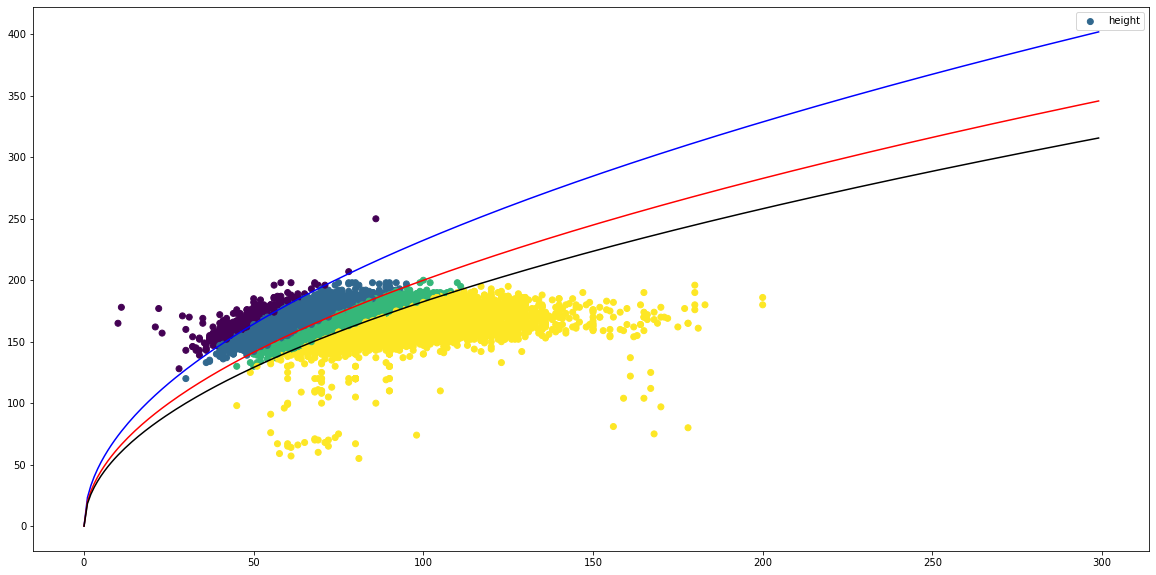

In [22]:
from sklearn.cluster import KMeans
WH = data[["height","weight"]]
within_ss = []

kmeans4 = KMeans(n_clusters = 4, init = "k-means++", n_init = 10)
kmeans4.fit(WH)

labels = kmeans4.predict(WH)
display(labels)
WH_labeled = WH.copy()
WH_labeled["Cluster"] = pd.Categorical(labels)
WH_labeled["Obesity"] = data["Obesity_num"]
display(WH_labeled)
display(WH_labeled.dtypes)

fig1 = plt.figure(figsize = (20,10))
plt.scatter(x = "weight",y = "height", c = "Cluster", data = WH_labeled)
fig2 = plt.figure(figsize = (20,10))
plt.scatter(x = "weight",y = "height", c = "Obesity", data = WH_labeled)
x_val = np.arange(0,300)
plt.plot(x_val,np.sqrt(x_val/18.5)*100, c = "b", label = "BMI = 18.5")
plt.plot(x_val,np.sqrt(x_val/25)*100, c = "r", label = "BMI = 25")
plt.plot(x_val,np.sqrt(x_val/30)*100, c = "black", label = "BMI = 30")
plt.legend()
plt.show()


## BMI is not kmean clustering of shortest distance

Features 	Age 	Height 	Weight 	ap_lo 	ap_hi

Cluster 0:	53.34	164.36	74.21	93.81	128.81	
Cluster 1:	52.96	167.08	72.79	8317.42	136.25	

Within Cluster Sum of Squares : 2546758518.243096



<AxesSubplot:xlabel='Cluster', ylabel='count'>

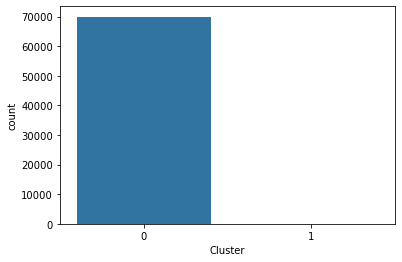

<Figure size 720x720 with 0 Axes>

In [23]:
# Set "optimal" Clustering Parameters
num_clust = 2
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

print("Features", "\tAge", "\tHeight", "\tWeight", "\tap_lo", "\tap_hi")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
display(sb.countplot(x=X_labeled["Cluster"]))

fig = plt.figure(figsize = (10,10))


<AxesSubplot:xlabel='ap_hi', ylabel='Cluster'>

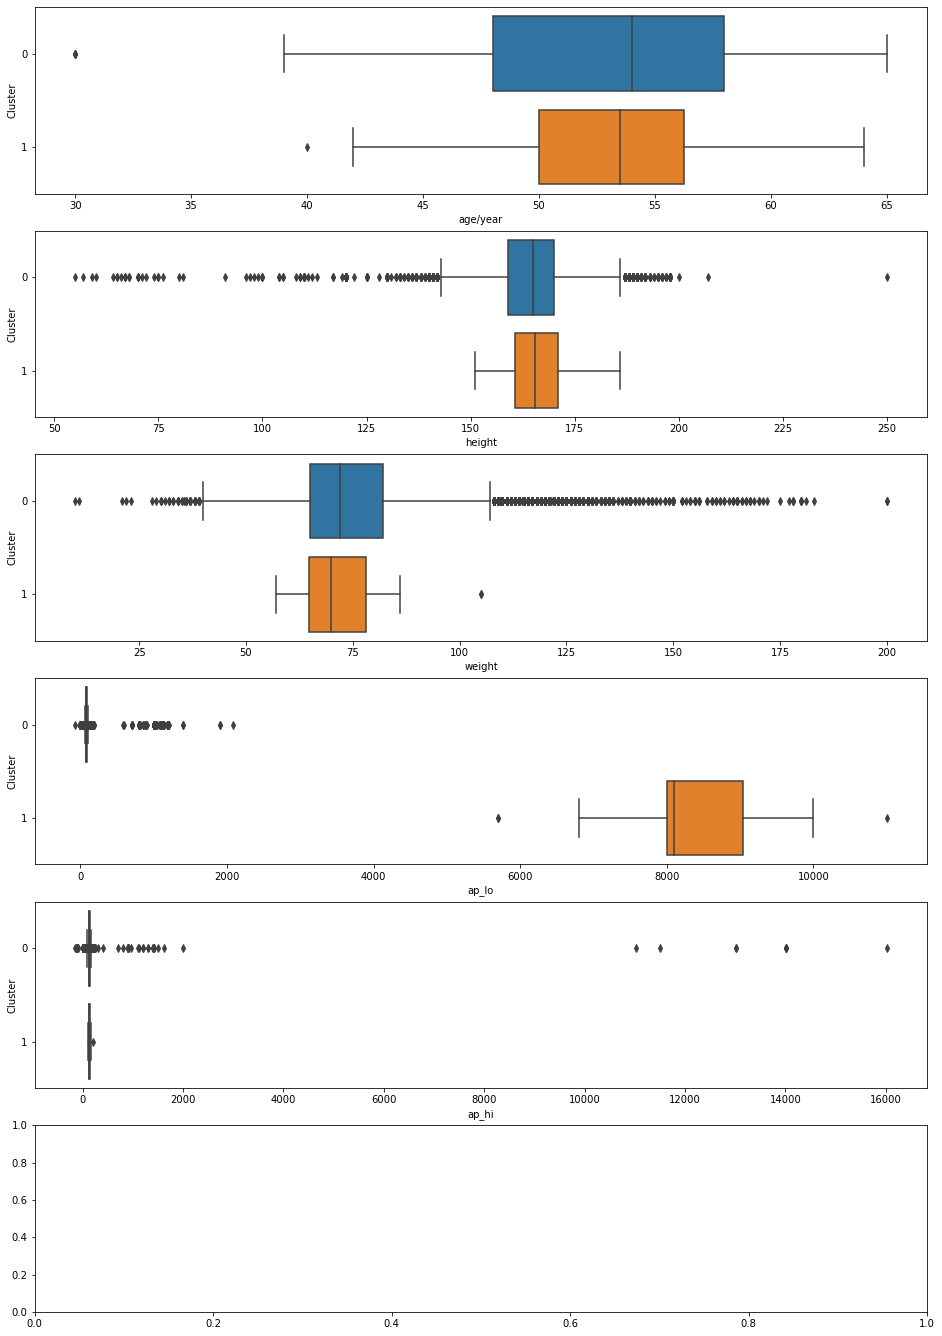

In [24]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(6, 1, figsize=(16,24))
sb.boxplot(x = 'age/year', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'height', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'weight', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'ap_lo', y = 'Cluster', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'ap_hi', y = 'Cluster', data = X_labeled, ax = axes[4])

<AxesSubplot:xlabel='Cluster'>

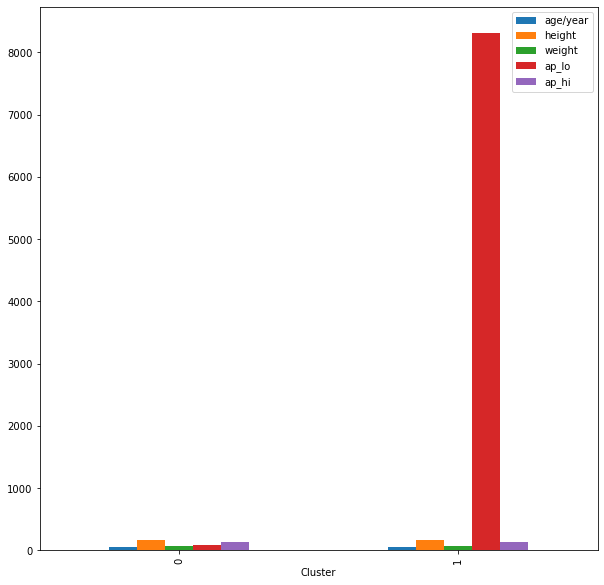

In [25]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (10,10))


In [26]:
## Need to clean up the ap_hi, ap_lo

Classification Accuracy on training set 	: 0.7249333333333333
Classification Accuracy on test set: 0.7283428571428572


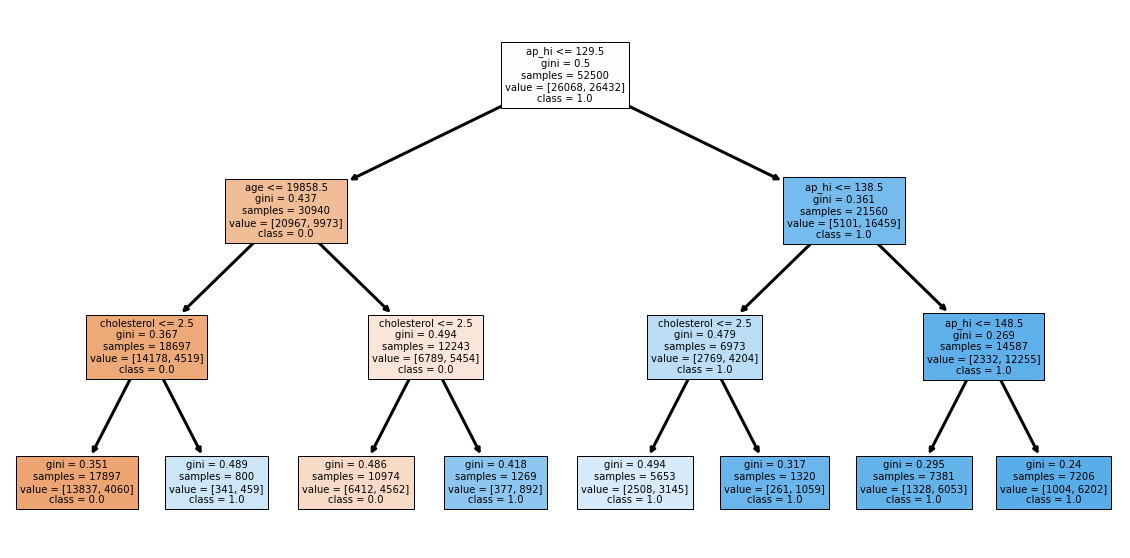

In [27]:
## Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(max_depth = 3)

# Get data
dfX = cardio_clean.drop(labels = ['cardio','Obesity'], axis = 1)
X = dfX.values.astype("float64")
y = cardio_clean['cardio'].values.astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Fit the data into the model
tree.fit(X_train, y_train)

# Get the explained variance and mean square error
print("Classification Accuracy on training set \t:", tree.score(X_train, y_train))
print("Classification Accuracy on test set: {}".format(tree.score(X_test, y_test)))


# Plot out the tree
plt.figure(figsize = (20,10))

out = plot_tree(tree, 
          feature_names = cardio_clean.columns,
          class_names = [str(x) for x in tree.classes_],
          filled=True,
          fontsize = 10)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

<AxesSubplot:>

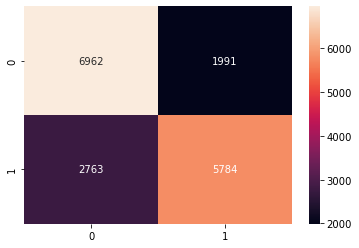

In [28]:
from sklearn.metrics import confusion_matrix
predict = tree.predict(X_test)
tree.score(X_test, y_test)
y_prob = tree.predict_proba(X_test)
sb.heatmap(confusion_matrix(y_test,predict), annot = True, fmt = "0.0f")

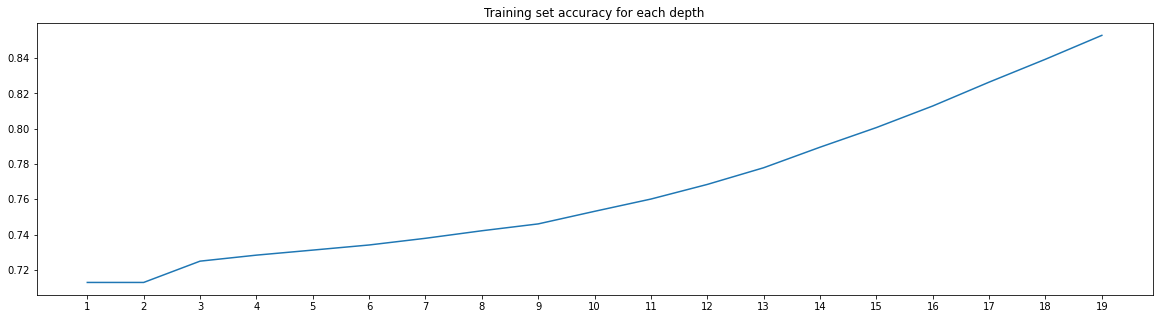

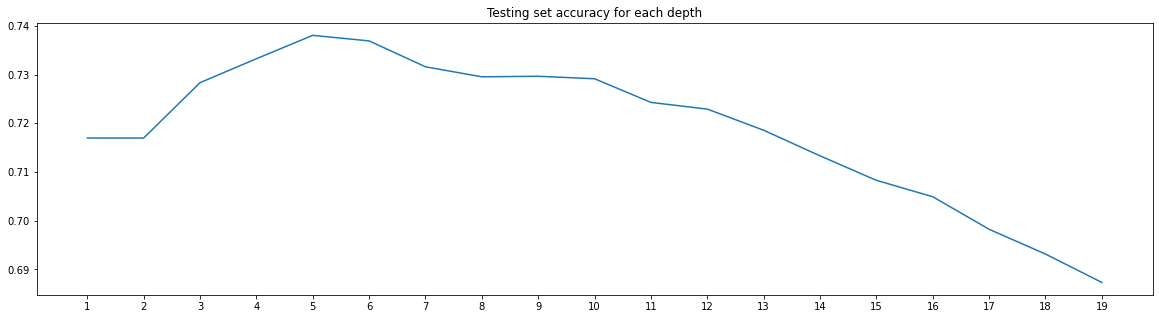

In [29]:
import numpy as np
from matplotlib.ticker import MaxNLocator

train_scores = []
test_scores = []
for i in range(1,20):
  ## Best depth is 4
  tree = DecisionTreeClassifier(max_depth = i)
  tree.fit(X_train, y_train)
  train_scores.append(tree.score(X_train, y_train))
  test_scores.append(tree.score(X_test, y_test))

fig = plt.figure(figsize = (20,5))
# ax = fig.gca()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(np.arange(1,20))
plt.title("Training set accuracy for each depth")
plt.plot(np.arange(1,20), train_scores)

fig = plt.figure(figsize = (20,5))
# ax = fig.gca()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(np.arange(1,20))
plt.title("Testing set accuracy for each depth")
plt.plot(np.arange(1,20), test_scores)

Classification Accuracy on training set 	: 0.7266476190476191
Classification Accuracy on test set: 0.7289142857142857


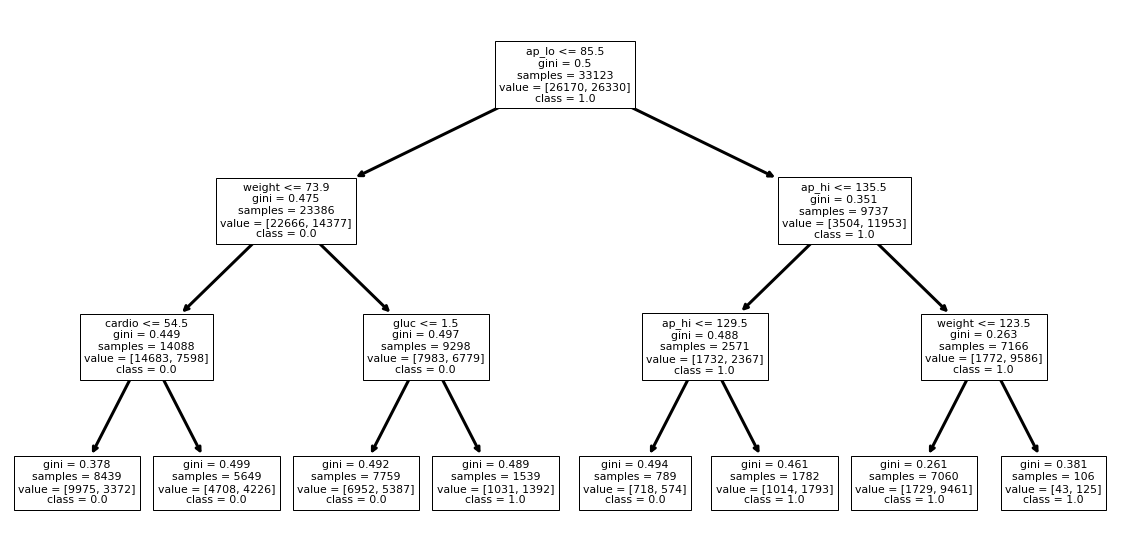

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

tree = RandomForestClassifier(max_depth = 3, n_estimators=100)

# Get data
dfX = cardio_clean.drop(labels = ['cardio','Obesity'], axis = 1)
X = dfX.values
y = cardio_clean['cardio'].values
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_train = y_train.astype('float')
y_test = y_test.astype('float')

# Fit the data into the model
tree.fit(X_train, y_train)

# Get the explained variance and mean square error
print("Classification Accuracy on training set \t:", tree.score(X_train, y_train))
print("Classification Accuracy on test set: {}".format(tree.score(X_test, y_test)))


# Plot out the tree
plt.figure(figsize = (20,10))

out = plot_tree(
          tree.estimators_[0], 
          feature_names = cardio_clean.columns,
          class_names = [str(x) for x in tree.estimators_[0].classes_])

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()


<AxesSubplot:xlabel='Obesity', ylabel='cardio'>

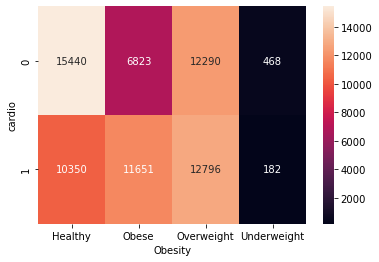

In [31]:
sb.heatmap(data.groupby(["cardio","Obesity"]).size().unstack(), annot = True, fmt = "0.0f")

<AxesSubplot:xlabel='BMI', ylabel='cardio'>

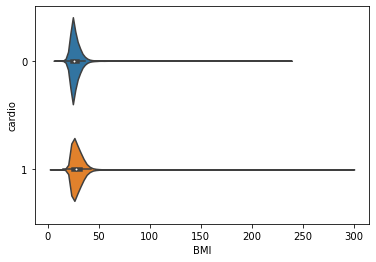

In [32]:
sb.violinplot(x = "BMI", y = "cardio",data = data)